In [72]:
ls

winequalityN.csv  wine_quality_test.ipynb


# Importing Library

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In [74]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [75]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [76]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [77]:
df.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [79]:
df = pd.get_dummies(df , drop_first=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_white            6497 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 615.6 KB


In [81]:
df['type_white'].value_counts()

1    4898
0    1599
Name: type_white, dtype: int64

In [82]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_white               0
dtype: int64

In [83]:
df = df.dropna()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

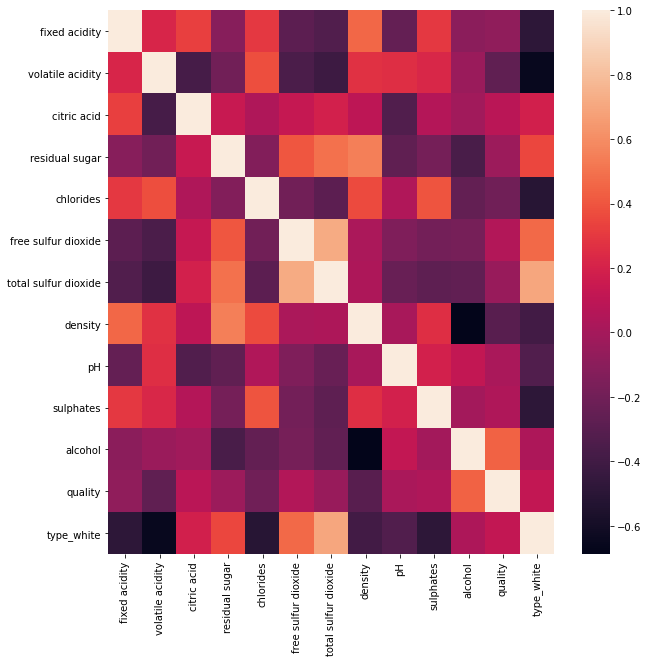

In [84]:
plt.figure(figsize=(10 , 10))
sns.heatmap(df.corr())

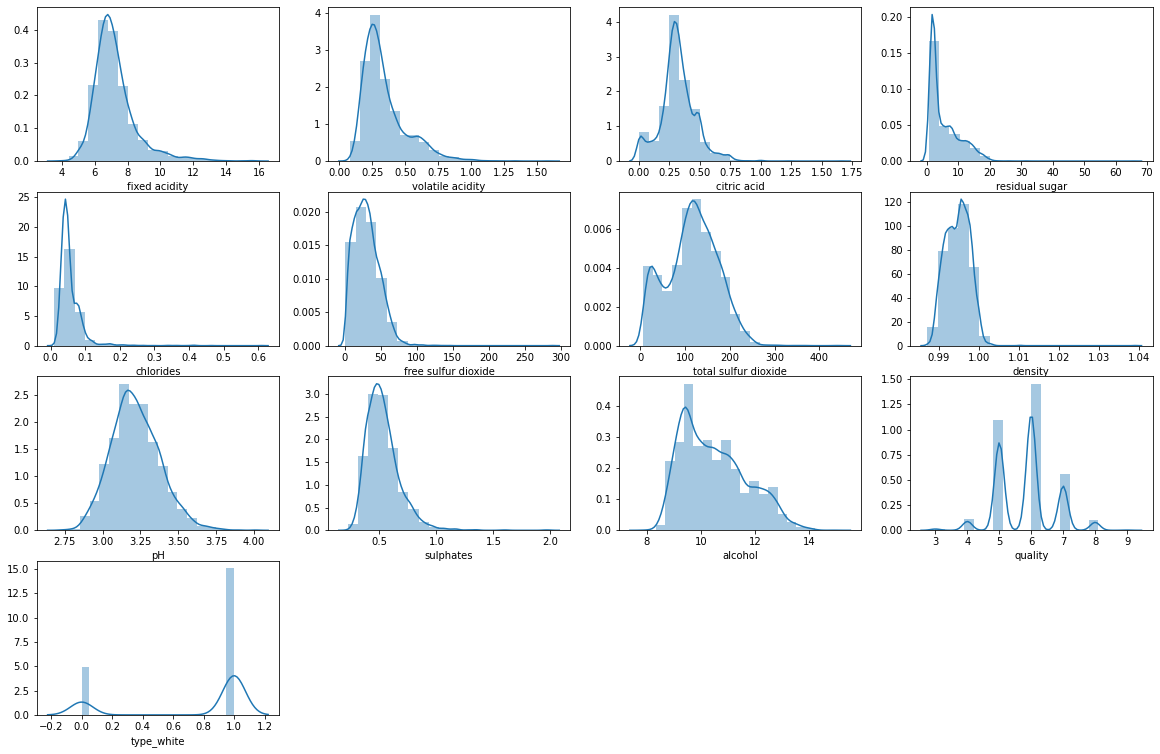

In [85]:
plt.figure(figsize=(20,30))
for i , val in enumerate(df.keys()):
    plt.subplot(9,4,i+1)
    sns.distplot(df[val], bins=20)


# Test_Train_Split

In [86]:
from sklearn.model_selection import train_test_split

Y = df.iloc[: , 11:12].values
x_data = df.drop('quality' , axis=1)
X = x_data.iloc[: , :].values
x_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [87]:
print(X.shape , Y.shape)
print(Y)

(6463, 12) (6463, 1)
[[6]
 [6]
 [6]
 ...
 [6]
 [5]
 [6]]


In [88]:
x_train , x_test  , y_train , y_test = train_test_split(X , Y , test_size= 0.2)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)
print(y_train)

(5170, 12) (1293, 12) (5170, 1) (1293, 1)
[[6]
 [5]
 [6]
 ...
 [8]
 [6]
 [6]]


# Model Creation

In [89]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100) #default  n_estimators=100
y_train = y_train.flatten()
clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)


# Accuracy of model

In [90]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score
print("Accuracy Score -> " , accuracy_score(y_test.flatten() , y_pred))



Accuracy Score ->  0.7022428460943542


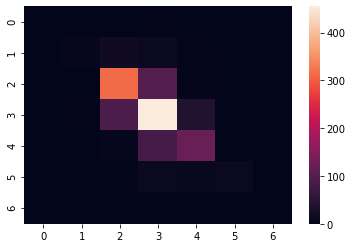

In [91]:
sns.heatmap(confusion_matrix(y_test.flatten() , y_pred))

In [92]:
print(clf.predict([[7.0 ,0.27,0.36 ,20.7 , 0.045 , 45.0 , 170.0 , 1.0010  , 3.00  , 0.45 ,8.8 ,1]]))

[6]
